In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt

# ppr imports
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber, TrajectoryPtLineTol
from ppr.geometry import Rectangle
from ppr.sampling import cart_to_joint, get_shortest_path
from ppr.optim import get_optimal_trajectory, Solver

In [2]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
t = np.linspace(0, np.pi/2, 6); R = 3;
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)

path1 = []
for ti in t:
    xin = R * np.cos(ti)
    xi = TolerancedNumber(xin, xin-0.5, xin+0.3, samples=6)
    pi = [xi, R * np.sin(ti), angle]
    path1.append(TrajectoryPt(pi))

# TUBE PATH
v = TolerancedNumber(0, -0.5, 0.3, samples=6)
path2 = []
for ti in t:
    pi = [R * np.cos(ti), R * np.sin(ti), 0]
    path2.append(TrajectoryPtLineTol(pi, v, ti))

# COLLISION SCENE
sc2 = [Rectangle(-2, 1, 1.5, 1, -0.1)]
sc1 = [Rectangle(3, 1.3, 2, 1, -0.1),
       Rectangle(3, 0.5, 2, 0.3, 0)]

converting type of Q
[79 68 57 45 23 13]
True


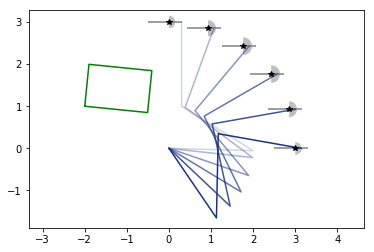

In [3]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc2)
sol = get_shortest_path(path_js)
print(sol['success'])

fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path_kinematics(ax2, sol['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

converting type of Q
[0 0 0 0 0 0]
True


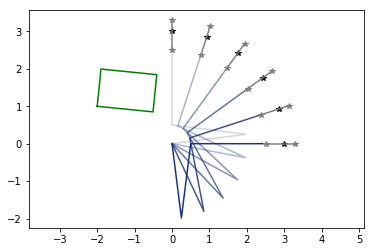

In [4]:
path_js = cart_to_joint(robot1, path2, check_collision=True, scene=sc2)
sol2 = get_shortest_path(path_js)
print(sol2['success'])

fig2, ax2 = plt.subplots()
ax2.axis('equal')
robot1.plot_path_kinematics(ax2, sol2['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path2: tp.plot(ax2)
plt.show()

# optimisation approach

In [5]:
q_init = sol['path']
q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, check_collision=True, scene=sc2)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 1.5115190862053092
            Iterations: 101
            Function evaluations: 2282
            Gradient evaluations: 98


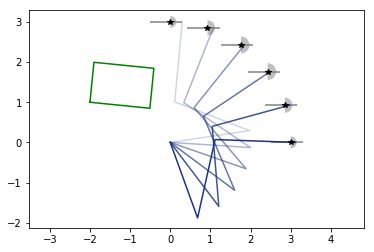

In [6]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, q_opt)
for r in sc2: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()

## Test Solver class

In [7]:
solver = Solver(robot1, path1, sc2)
solver.add_path_constraints()
solver.add_collision_constaints()

In [8]:
q_init = sol['path']
optsol2 = solver.run(q_init)
optsol2['success']

False

In [9]:
from ppr.optim import reshape_path_vector

_, q_sol = reshape_path_vector(optsol2['x'])
q_sol

array([[-1.22351015,  2.57434761, -1.38645071],
       [-0.9216949 ,  2.57434765, -1.38600224],
       [-0.63876061,  2.60965627, -1.38029872],
       [-0.33484311,  2.60998612, -1.38029783],
       [-0.0636774 ,  2.61165971, -1.35278225],
       [ 0.14747589,  2.62847312, -1.30004317]])

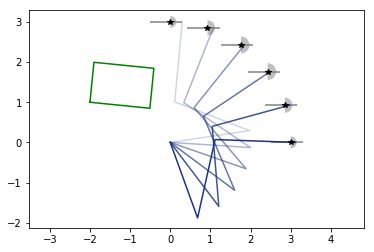

In [10]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, q_sol)
for r in sc2: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()

## Tube constraints

In [11]:
solver = Solver(robot1, path2, sc2)
solver.add_collision_constaints()
solver.add_tube_constraints()

In [12]:
q_init = sol2['path']
sol2 = solver.run(q_init)
sol2['success']

False

In [13]:
from ppr.optim import reshape_path_vector

_, q_sol2 = reshape_path_vector(sol2['x'])

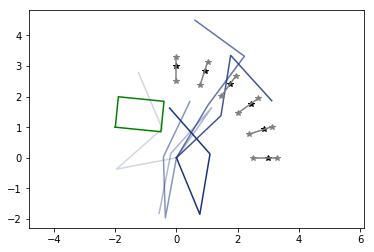

In [14]:
fig4, ax4 = plt.subplots()
ax4.axis('equal')
robot1.plot_path_kinematics(ax4, q_sol2)
for r in sc2: r.plot(ax4, 'g')
for tp in path2: tp.plot(ax4)
plt.show()